# Create example plots for the simulation cases.


In [1]:
import numpy as np
from mlconfound.simulate import simulate_y_c_yhat, sigmoid, polynomial
from mlconfound.stats import _binom_ci
import seaborn as sns
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

In [17]:
N=1
n=10000

w_yc=2.0
w_yyhat=2.0
w_cyhat=0 # H0

## 1. all normal and linear

0.8912818457659338
0.8923946447174246
0.797926717141237


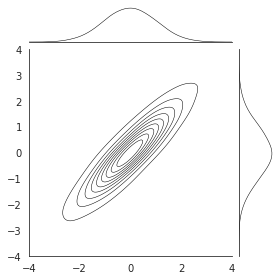

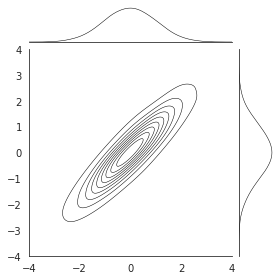

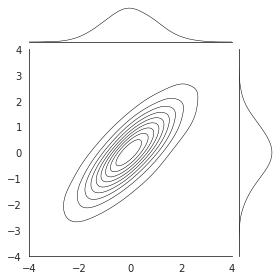

In [18]:
y, c, yhat =simulate_y_c_yhat(w_yc=w_yc,
                              w_yyhat=w_yyhat, w_cyhat=w_cyhat,
                              n=n,
                              random_state=4242)

with sns.axes_style("white"):
    print(np.corrcoef(x=y,y=c)[0,1])
    sns.jointplot(x=y,y=c, kind="kde", height=4,
                  marginal_kws={"color":"black", "lw":0.5, "bw_adjust":2},
                  joint_kws={"colors":"black", "linewidths":0.5, "bw_adjust":2},
                  xlim = (-4,4), ylim = (-4,4))
    print(np.corrcoef(x=y,y=yhat)[0,1])
    sns.jointplot(x=y,y=yhat, kind="kde", height=4,
                  marginal_kws={"color":"black", "lw":0.5, "bw_adjust":2},
                  joint_kws={"colors":"black", "linewidths":0.5, "bw_adjust":2},
                  xlim = (-4,4), ylim = (-4,4))
    print(np.corrcoef(x=c,y=yhat)[0,1])
    sns.jointplot(x=c,y=yhat, kind="kde", height=4,
                  marginal_kws={"color":"black", "lw":0.5, "bw_adjust":2},
                  joint_kws={"colors":"black", "linewidths":0.5, "bw_adjust":2},
                  xlim = (-4,4), ylim = (-4,4))

## 2. y|c non-normal

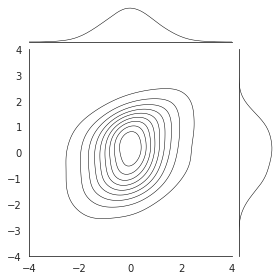

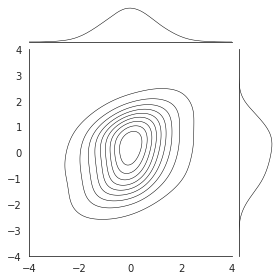

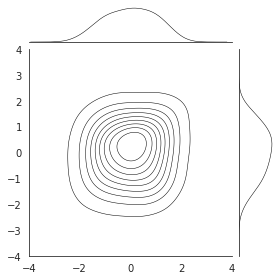

In [23]:
y, c, yhat =simulate_y_c_yhat(w_yc=w_yc,
                              w_yyhat=w_yyhat, w_cyhat=w_cyhat,
                              n=n,
                              random_state=42,
                              delta=0.1,
                              epsilon=5)
with sns.axes_style("white"):
    sns.jointplot(x=y,y=c, kind="kde", height=4,
                  marginal_kws={"color":"black", "lw":0.5, "bw_adjust":2},
                  joint_kws={"colors":"black", "linewidths":0.5, "bw_adjust":2},
                  xlim = (-4,4), ylim = (-4,4))
    sns.jointplot(x=y,y=yhat, kind="kde", height=4,
                  marginal_kws={"color":"black", "lw":0.5, "bw_adjust":2},
                  joint_kws={"colors":"black", "linewidths":0.5, "bw_adjust":2},
                  xlim = (-4,4), ylim = (-4,4))

    sns.jointplot(x=c,y=yhat, kind="kde", height=4,
                  marginal_kws={"color":"black", "lw":0.5, "bw_adjust":2},
                  joint_kws={"colors":"black", "linewidths":0.5, "bw_adjust":2},
                  xlim = (-4,4), ylim = (-4,4))

## y - yhat nonlinear


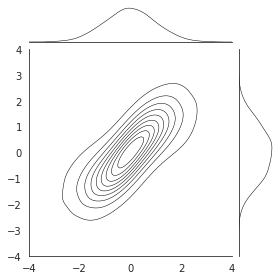

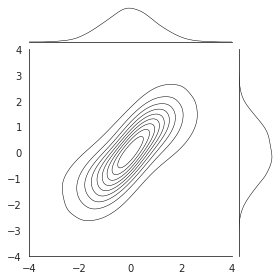

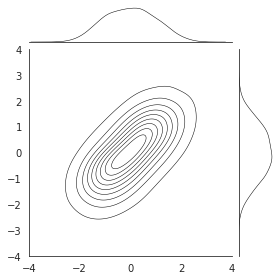

In [20]:
y, c, yhat =simulate_y_c_yhat(w_yc=w_yc,
                              w_yyhat=w_yyhat, w_cyhat=w_cyhat,
                              n=n,
                              random_state=42,
                              delta=1,
                              epsilon=0,
                              nonlin_trf_fun=sigmoid)
with sns.axes_style("white"):
    sns.jointplot(x=y,y=c, kind="kde", height=4,
                  marginal_kws={"color":"black", "lw":0.5, "bw_adjust":1.5},
                  joint_kws={"colors":"black", "linewidths":0.5, "bw_adjust":2},
                  xlim = (-4,4), ylim = (-4,4))
    sns.jointplot(x=y,y=yhat, kind="kde", height=4,
                  marginal_kws={"color":"black", "lw":0.5, "bw_adjust":1.5},
                  joint_kws={"colors":"black", "linewidths":0.5, "bw_adjust":2},
                  xlim = (-4,4), ylim = (-4,4))
    sns.jointplot(x=c,y=yhat, kind="kde", height=4,
                  marginal_kws={"color":"black", "lw":0.5, "bw_adjust":1.5},
                  joint_kws={"colors":"black", "linewidths":0.5, "bw_adjust":2},
                  xlim = (-4,4), ylim = (-4,4))


# Simulation results

#### Run simulations (possibly in a HCP environment)
`./run_all.sh`

### Some plotting functions

In [6]:
def positive_rate(data, alpha=0.05):
    return (data < alpha).sum() / len(data)

def truncate_colormap(cmap, minval=None, maxval=None, n=100):
    '''
    https://stackoverflow.com/a/18926541
    '''
    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

def positive_rate_heatmap(data, col_a, col_b, value, vmin=None, vmax=None,
                          palette="inferno", **kws):

    r2_y_yhat = data.pivot_table(index=col_b, values=['r2_y_yhat'], columns=col_a, aggfunc=np.mean)
    r2_y_c = data.pivot_table(index=col_b, values=['r2_y_c'], columns=col_a, aggfunc=np.mean)
    r2_yhat_c = data.pivot_table(index=col_b, values=['r2_yhat_c'], columns=col_a, aggfunc=np.mean)

    pr = data.pivot_table(index=col_b, values=[value], columns=col_a, aggfunc=positive_rate)

    annot = np.round(r2_y_c, 2).astype(str).values + '\n' + np.round(pr, 2).astype(str).values

    print(np.round(np.mean(r2_y_yhat.values), 2),
          np.round(np.mean(r2_yhat_c.values), 2),
          np.round(np.mean(r2_yhat_c.values), 2))

    sns.heatmap(data.pivot_table(index=col_b, values=[value], columns=col_a, aggfunc=positive_rate),
                linewidths=0.2,
                vmin=vmin, vmax=vmax,
                cmap=truncate_colormap(sns.color_palette(palette, as_cmap=True), 0, 0.5),
                annot=annot, #True,
                fmt='',
                #annot=True,
                **kws)

# Simulations under the null

#### Load simulation results

In [8]:
h0_ccc_partial_d10e0_lin = pd.read_csv("results/h0_ccc_partial_d1e0_linear.csv")
h0_ccc_partial_d05e0_lin = pd.read_csv("results/h0_ccc_partial_d01e0_linear.csv")
h0_ccc_partial_d10e0_sig = pd.read_csv("results/h0_ccc_partial_d1e0_sigmoid.csv")

h0_ccc_partial_d10e0_lin

,Unnamed: 0,p_cpt_lin,p_cpt_gam,p_pc_pearson,p_pc_spearman,r2_y_c,r2_yhat_c,r2_y_yhat,n,w_yc,w_yyhat,w_cyhat,num_perms,random_seed
0,0,0.270,0.277,0.557324,0.279557,0.186765,0.039907,0.182485,1000,0.5,0.5,0,1000,191664963
1,1,0.692,0.708,0.600240,0.238913,0.192582,0.031894,0.191426,1000,0.5,0.5,0,1000,1662057957
2,2,0.989,0.990,0.024290,0.067089,0.154460,0.011496,0.179639,1000,0.5,0.5,0,1000,1405681631
3,3,0.111,0.107,0.221490,0.088166,0.188008,0.051319,0.203068,1000,0.5,0.5,0,1000,942484272
4,4,0.977,0.971,0.031193,0.153051,0.209158,0.027506,0.229448,1000,0.5,0.5,0,1000,929893137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,15995,0.642,0.635,0.727616,0.965173,0.888261,0.791660,0.893658,1000,3.0,3.0,0,1000,1028934775
15996,15996,0.063,0.065,0.062501,0.001223,0.904786,0.823393,0.898451,1000,3.0,3.0,0,1000,428010435
15997,15997,0.269,0.286,0.466101,0.851414,0.908003,0.818170,0.896585,1000,3.0,3.0,0,1000,498744826
15998,15998,0.273,0.276,0.364663,0.024878,0.902782,0.814156,0.896071,1000,3.0,3.0,0,1000,1426840372


Binomial confidence intervals for 1000 simulations (per tile): [0.037 0.065]
0.6 0.36 0.36


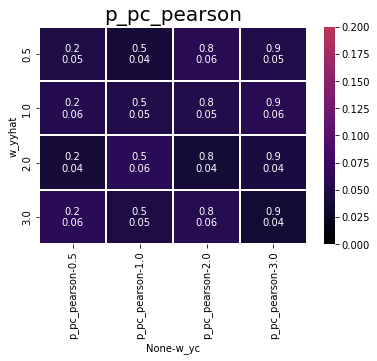

0.6 0.36 0.36


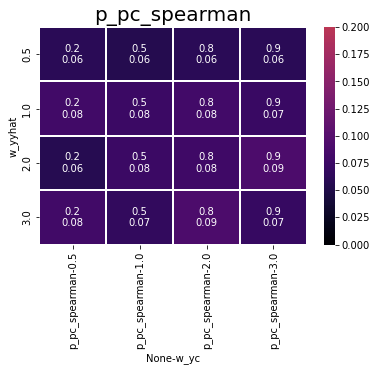

0.6 0.36 0.36


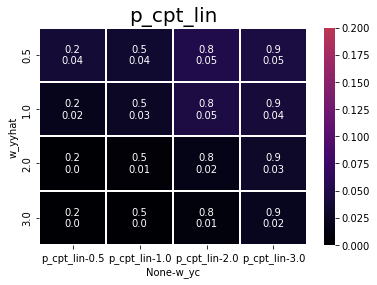

0.6 0.36 0.36


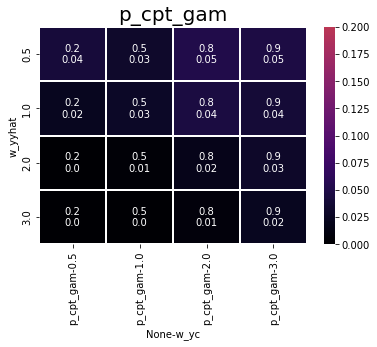

In [9]:
df=h0_ccc_partial_d10e0_lin

n=int(df.n.mean())
print("Binomial confidence intervals for", n, "simulations (per tile):",
      np.round(_binom_ci(success=0.05*n, total=n, ci=.95), decimals=3))

plt.title("p_pc_pearson", fontsize=20)
positive_rate_heatmap(df, "w_yc", "w_yyhat", "p_pc_pearson", vmin=0, vmax=0.2)
plt.show()
plt.title("p_pc_spearman", fontsize=20)
positive_rate_heatmap(df, "w_yc", "w_yyhat", "p_pc_spearman", vmin=0, vmax=0.2)
plt.show()
plt.title("p_cpt_lin", fontsize=20)
positive_rate_heatmap(df, "w_yc", "w_yyhat", "p_cpt_lin", vmin=0, vmax=0.2)
plt.show()
plt.title("p_cpt_gam", fontsize=20)
positive_rate_heatmap(df, "w_yc", "w_yyhat", "p_cpt_gam", vmin=0, vmax=0.2)

Binomial confidence intervals for 1000 simulations (per tile): [0.037 0.065]
0.99 0.98 0.98


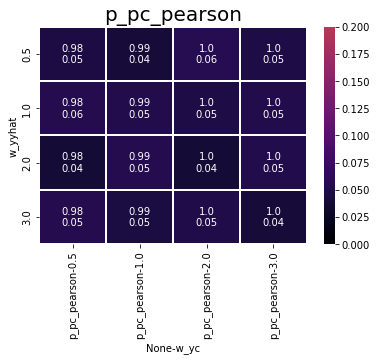

0.99 0.98 0.98


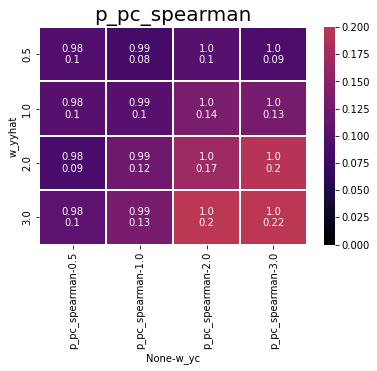

0.99 0.98 0.98


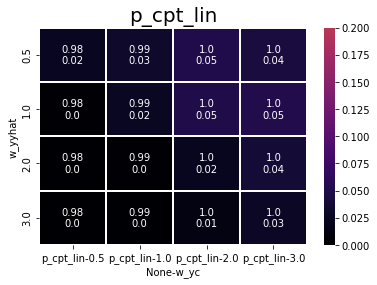

0.99 0.98 0.98


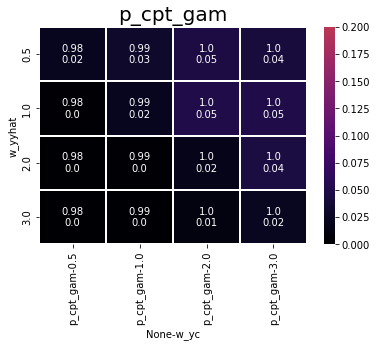

In [10]:
df=h0_ccc_partial_d05e0_lin

n=int(df.n.mean())
print("Binomial confidence intervals for", n, "simulations (per tile):",
      np.round(_binom_ci(success=0.05*n, total=n, ci=.95), decimals=3))

plt.title("p_pc_pearson", fontsize=20)
positive_rate_heatmap(df, "w_yc", "w_yyhat", "p_pc_pearson", vmin=0, vmax=0.2)
plt.show()
plt.title("p_pc_spearman", fontsize=20)
positive_rate_heatmap(df, "w_yc", "w_yyhat", "p_pc_spearman", vmin=0, vmax=0.2)
plt.show()
plt.title("p_cpt_lin", fontsize=20)
positive_rate_heatmap(df, "w_yc", "w_yyhat", "p_cpt_lin", vmin=0, vmax=0.2)
plt.show()
plt.title("p_cpt_gam", fontsize=20)
positive_rate_heatmap(df, "w_yc", "w_yyhat", "p_cpt_gam", vmin=0, vmax=0.2)

Binomial confidence intervals for 1000 simulations (per tile): [0.037 0.065]
0.41 0.2 0.2


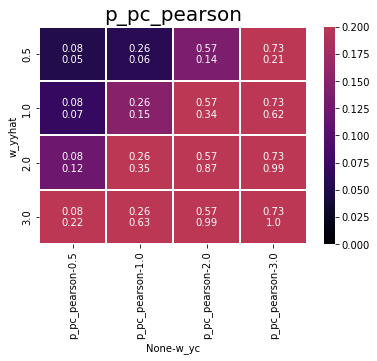

0.41 0.2 0.2


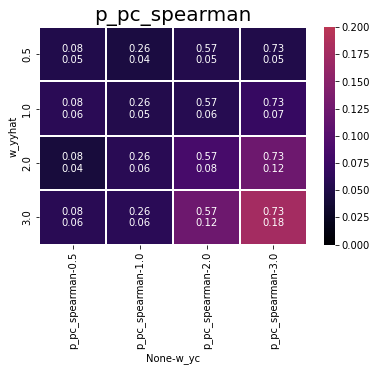

0.41 0.2 0.2


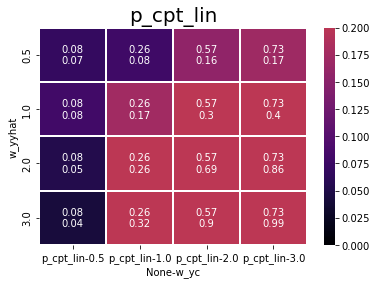

0.41 0.2 0.2


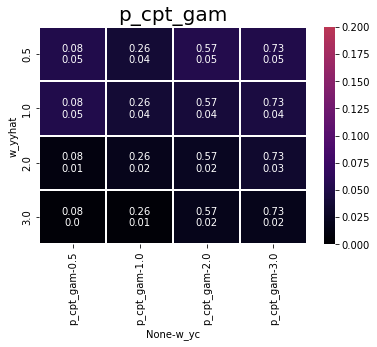

In [11]:
df=h0_ccc_partial_d10e0_sig

n=int(df.n.mean())
print("Binomial confidence intervals for", n, "simulations (per tile):",
      np.round(_binom_ci(success=0.05*n, total=n, ci=.95), decimals=3))

plt.title("p_pc_pearson", fontsize=20)
positive_rate_heatmap(df, "w_yc", "w_yyhat", "p_pc_pearson", vmin=0, vmax=0.2)
plt.show()
plt.title("p_pc_spearman", fontsize=20)
positive_rate_heatmap(df, "w_yc", "w_yyhat", "p_pc_spearman", vmin=0, vmax=0.2)
plt.show()
plt.title("p_cpt_lin", fontsize=20)
positive_rate_heatmap(df, "w_yc", "w_yyhat", "p_cpt_lin", vmin=0, vmax=0.2)
plt.show()
plt.title("p_cpt_gam", fontsize=20)
positive_rate_heatmap(df, "w_yc", "w_yyhat", "p_cpt_gam", vmin=0, vmax=0.2)



# Simulations under the alternative hypothesis

#### Load simulated results

In [13]:
ccc_partial_d10e0_lin = pd.read_csv("results/h1_ccc_partial_d1e0_linear.csv")
ccc_partial_d05e0_lin = pd.read_csv("results/h1_ccc_partial_d.5e0_linear.csv")
ccc_partial_d10e0_sig = pd.read_csv("results/h1_ccc_partial_d1e0_sigmoid.csv")

ccc_partial_d10e0_lin

,Unnamed: 0,p_cpt_lin,p_cpt_gam,p_pc_pearson,p_pc_spearman,r2_y_c,r2_yhat_c,r2_y_yhat,n,w_yc,w_yyhat,w_cyhat,num_perms,random_seed
0,0,0.788,0.784,7.794433e-01,7.211179e-01,0.000376,0.001654,0.000360,50,0.0,0.0,0.0,1000,191664963
1,1,0.600,0.604,5.710627e-01,6.472728e-01,0.000516,0.006607,0.004088,50,0.0,0.0,0.0,1000,1662057957
2,2,0.472,0.459,4.545696e-01,5.377445e-01,0.003221,0.010611,0.009781,50,0.0,0.0,0.0,1000,1405681631
3,3,0.685,0.686,6.860549e-01,2.539236e-01,0.001962,0.003127,0.004889,50,0.0,0.0,0.0,1000,942484272
4,4,0.255,0.255,2.445166e-01,4.109230e-01,0.046423,0.029165,0.000625,50,0.0,0.0,0.0,1000,929893137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25595,25595,0.000,0.000,4.407416e-32,1.892493e-34,0.485969,0.509998,0.645642,1000,1.0,1.0,0.6,1000,105287469
25596,25596,0.000,0.000,1.875409e-31,7.496141e-31,0.544011,0.528310,0.610365,1000,1.0,1.0,0.6,1000,1026996777
25597,25597,0.000,0.000,9.291577e-45,3.982991e-45,0.485338,0.549439,0.648913,1000,1.0,1.0,0.6,1000,1199482986
25598,25598,0.000,0.000,2.168678e-42,1.087925e-42,0.509059,0.549822,0.626461,1000,1.0,1.0,0.6,1000,560168583


0.23 0.07 0.07
0.23 0.06 0.06
0.23 0.05 0.05
0.23 0.05 0.05
0.26 0.13 0.13
0.26 0.12 0.12
0.26 0.12 0.12
0.26 0.12 0.12
0.29 0.23 0.23
0.29 0.22 0.22
0.28 0.22 0.22
0.28 0.22 0.22
0.31 0.34 0.34
0.3 0.33 0.33
0.3 0.33 0.33
0.3 0.33 0.33


/home/tspisak/src/RPN-signature/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


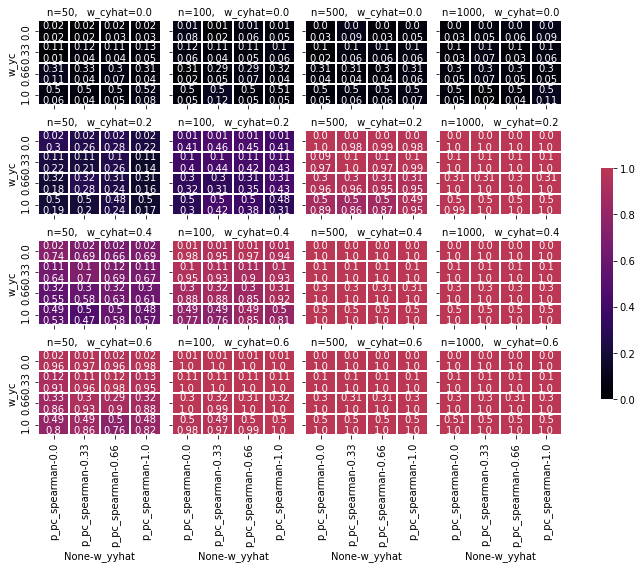

In [16]:
df=ccc_partial_d10e0_lin
p='p_pc_spearman'


g=sns.FacetGrid(df, col='n', row='w_cyhat', height=2, aspect=1)
cbar_ax = g.fig.add_axes([1.05, .3, .02, .4])  # <-- Create a colorbar axes

def true_positive_rate_heatmap(*args, **kwargs):
    defaultKwargs = { 'vmin': 0, 'vmax': 1 }
    kwargs = { **defaultKwargs, **kwargs }
    return positive_rate_heatmap(*args, **kwargs)

g.map_dataframe(true_positive_rate_heatmap, col_a='w_yyhat', col_b='w_yc', value=p, cbar_ax=cbar_ax,)
g.set_titles("n={col_name},   w_cyhat={row_name}")

#plt.savefig('../data_out/fig/sim_ccc_normal_all_heatmap.pdf')



0.23 0.07 0.07
0.23 0.06 0.06
0.23 0.05 0.05
0.23 0.05 0.05
0.26 0.13 0.13
0.26 0.12 0.12
0.26 0.12 0.12
0.26 0.12 0.12
0.29 0.23 0.23
0.29 0.22 0.22
0.28 0.22 0.22
0.28 0.22 0.22
0.31 0.34 0.34
0.3 0.33 0.33
0.3 0.33 0.33
0.3 0.33 0.33


/home/tspisak/src/RPN-signature/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


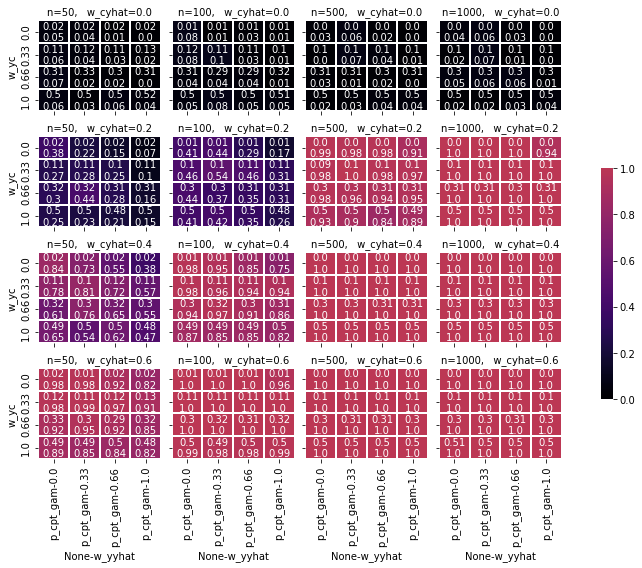

In [15]:
df=ccc_partial_d10e0_lin
p='p_cpt_gam'


g=sns.FacetGrid(df, col='n', row='w_cyhat', height=2, aspect=1)
cbar_ax = g.fig.add_axes([1.05, .3, .02, .4])  # <-- Create a colorbar axes

def true_positive_rate_heatmap(*args, **kwargs):
    defaultKwargs = { 'vmin': 0, 'vmax': 1 }
    kwargs = { **defaultKwargs, **kwargs }
    return positive_rate_heatmap(*args, **kwargs)

g.map_dataframe(true_positive_rate_heatmap, col_a='w_yyhat', col_b='w_yc', value=p, cbar_ax=cbar_ax,)
g.set_titles("n={col_name},   w_cyhat={row_name}")

#plt.savefig('../data_out/fig/sim_ccc_normal_all_heatmap.pdf')